In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#전처리
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import PolynomialFeatures

# 매개변수 그리드
from sklearn.model_selection import GridSearchCV


# 성능 평가
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

f1_scorer = make_scorer(f1_score, pos_label="Y")


#파이프라인
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline

# model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

import mglearn

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


ModuleNotFoundError: ignored

In [ ]:
datas = pd.read_csv('results.csv')
datas.info()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079619 entries, 0 to 1079618
Data columns (total 21 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   name      22183 non-null    object 
 1   neo       1079617 non-null  object 
 2   pha       1069004 non-null  object 
 3   H         1075633 non-null  float64
 4   diameter  139999 non-null   float64
 5   albedo    138848 non-null   float64
 6   rot_per   32577 non-null    float64
 7   spec_B    1666 non-null     object 
 8   e         1079619 non-null  float64
 9   a         1079619 non-null  float64
 10  q         1079619 non-null  float64
 11  i         1079619 non-null  float64
 12  om        1079619 non-null  float64
 13  w         1079619 non-null  float64
 14  ma        1079618 non-null  float64
 15  ad        1079617 non-null  float64
 16  n         1079619 non-null  float64
 17  tp        1079619 non-null  float64
 18  per       1079617 non-null  float64
 19  moid      1069004 non

In [ ]:
datas.isnull().sum()

name        1057436
neo               2
pha           10615
H              3986
diameter     939620
albedo       940771
rot_per     1047042
spec_B      1077953
e                 0
a                 0
q                 0
i                 0
om                0
w                 0
ma                1
ad                2
n                 0
tp                0
per               2
moid          10615
class             0
dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

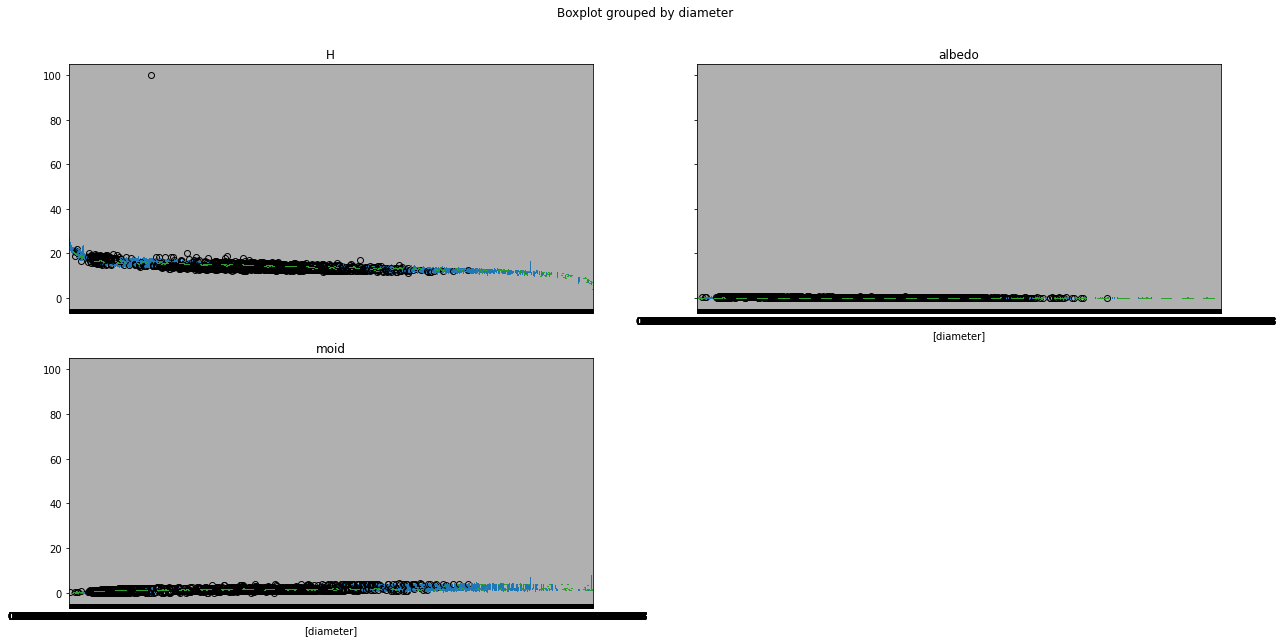

In [ ]:
datas[['H', 'moid', 'albedo', 'diameter']].boxplot(by='diameter', figsize=(20,10))

plt.show()
# class에 따른...

In [ ]:
X = datas.drop(['name', 'albedo', 'rot_per', 'spec_B'], axis=1)
X = X.dropna(subset=['diameter', 'moid', 'H', 'ma'])
y = X['diameter']

X = X.drop(['diameter'], axis=1)

print(X.shape)
print(y.shape)

# 특성 5개 제거 + 타겟값 분리

(137367, 16)
(137367,)


In [ ]:
X.head()

,neo,pha,H,e,a,q,i,om,w,ma,ad,n,tp,per,moid,class
0,N,N,3.53,0.078168,2.766089,2.549868,10.587899,80.272358,73.724889,205.545416,2.982310,0.214242,2.459921e+06,1680.341973,1.58537,MBA
1,N,N,4.21,0.229750,2.774382,2.136967,34.854459,172.965884,310.288113,187.586351,3.411796,0.213282,2.460009e+06,1687.903980,1.23487,MBA
2,N,N,5.26,0.256988,2.668020,1.982370,12.991482,169.853044,248.032767,170.711246,3.353669,0.226162,2.458446e+06,1591.776184,1.03316,MBA
3,N,N,3.29,0.088425,2.362030,2.153168,7.141653,103.808335,150.922482,258.567830,2.570893,0.271504,2.459574e+06,1325.948229,1.13933,MBA
4,N,N,6.99,0.190788,2.573621,2.082605,5.367534,141.571702,358.625009,65.612382,3.064636,0.238719,2.458926e+06,1508.048333,1.09563,MBA


In [ ]:
X_res = X[:30000]
y_res = y[:30000]
# 데이터는 30000개로 제한

X_dum = pd.get_dummies(X_res)
# 범주형 특성에 대해서 더미 변수를 생성

X_train, X_test, y_train, y_test = train_test_split(X_dum, y_res, random_state=0)
# 훈련 / 테스트 데이터로 분할

print(X_train.shape)
print(X_test.shape)

(22500, 28)
(7500, 28)


In [ ]:
# 스케일링

stdscaler = StandardScaler()

X_train_sscaled = stdscaler.fit_transform(X_train)
X_test_sscaled = stdscaler.transform(X_test)

mmscaler = MinMaxScaler()
X_train_mscaled = mmscaler.fit_transform(X_train)
X_test_mscaled = mmscaler.transform(X_test)


기본 파라미터로 모델 훈련

In [ ]:
rf = RandomForestRegressor(random_state=0).fit(X_train, y_train)
print(rf.score(X_test, y_test))
print(mean_squared_error(y_test, rf.predict(X_test)))

0.8754493841806057
29.663430119560424


In [ ]:
xg = XGBRegressor(random_state=0).fit(X_train, y_train)
print(xg.score(X_test, y_test))
print(mean_squared_error(y_test, xg.predict(X_test)))

[07:47:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8788905906969429
28.84385979184433


In [ ]:
svr = SVR().fit(X_train_sscaled, y_train)
print(svr.score(X_test, y_test))
print(mean_squared_error(y_test, svr.predict(X_test)))

-0.08020432444698322
257.2654119955832


In [ ]:
mlp = MLPRegressor(random_state=0).fit(X_train_sscaled, y_train)
print(mlp.score(X_test_sscaled, y_test))
print(mean_squared_error(y_test, mlp.predict(X_test_sscaled)))

0.7295517620545545
64.41094132273061


In [ ]:
# 중요도 함수
def plot_feature_importances(model, X, fea):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), fea)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
    plt.xlim(0,1)
    plt.grid()

Index(['H', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'per',
       'moid', 'neo_N', 'neo_Y', 'pha_N', 'pha_Y', 'class_AMO', 'class_APO',
       'class_AST', 'class_ATE', 'class_CEN', 'class_IMB', 'class_MBA',
       'class_MCA', 'class_OMB', 'class_TJN', 'class_TNO'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_

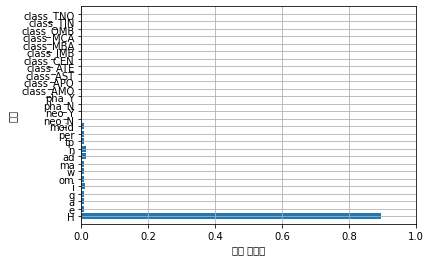

In [ ]:
features = X_train.columns
print(features)

plot_feature_importances(rf, X_train, features)